In [64]:
from matplotlib import pyplot as plt
import numpy as np

<img src="dataset.png">

In [108]:
#Dataseti oluşturalım length witdh ve mavi veya kırmızı değerlerini alacak
data = [
        [3,    1.5 , 1],
        [2,    1   , 0],
        [4,    1.5 , 1],
        [3,    1   , 0],
        [3.5,  .5  , 1],
        [2,    0.5 , 0],
        [5.5,  1   , 1],
        [1,    1   , 0],
       ]


In [109]:
def sigmoid(z):
    return 1/(1+np.exp(-z))#exp(-z) ifadesi e üzeri -z anlamındadır

def sigmoid_p(z):
    return sigmoid(z) * (1-sigmoid(z))

In [110]:
def rand():
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()
    return w1,w2,b

In [111]:
w1,w2,b = rand()

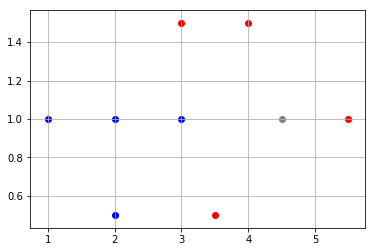

In [119]:
def vis():    
    #bilinmeyen değere x dedim
    x = [4.5,1]
    plt.grid()
    for l,w,c in data:
        color = 'r'
        if c is 0 :
            color = 'b'
        plt.scatter(l,w,c=color)
    #bilinmeyen
    plt.scatter([x[0]], [x[1]], c='gray')
vis()

In [113]:
for i in range(50):
    ri = np.random.randint(len(data))#ri ile data içinden rastgele sayı çekeceğim
    points = data[ri]
    
    z = w1*points[0] + w2*points[1] + b
    predicted = sigmoid(z)
    target = points[2]
    cost = np.square(target - predicted) 
    
    print(str(cost) + '\n' + str(points))

0.012557049506310747
[3, 1.5, 1]
0.7687533543865683
[2, 1, 0]
0.016224792397079045
[4, 1.5, 1]
0.7950677551684042
[1, 1, 0]
0.035926722607193914
[5.5, 1, 1]
0.7950677551684042
[1, 1, 0]
0.035926722607193914
[5.5, 1, 1]
0.035926722607193914
[5.5, 1, 1]
0.03377414439039757
[3.5, 0.5, 1]
0.73991408823343
[3, 1, 0]
0.012557049506310747
[3, 1.5, 1]
0.012557049506310747
[3, 1.5, 1]
0.012557049506310747
[3, 1.5, 1]
0.73991408823343
[3, 1, 0]
0.7950677551684042
[1, 1, 0]
0.7687533543865683
[2, 1, 0]
0.035926722607193914
[5.5, 1, 1]
0.7687533543865683
[2, 1, 0]
0.7950677551684042
[1, 1, 0]
0.03377414439039757
[3.5, 0.5, 1]
0.03377414439039757
[3.5, 0.5, 1]
0.012557049506310747
[3, 1.5, 1]
0.7950677551684042
[1, 1, 0]
0.016224792397079045
[4, 1.5, 1]
0.016224792397079045
[4, 1.5, 1]
0.035926722607193914
[5.5, 1, 1]
0.012557049506310747
[3, 1.5, 1]
0.035926722607193914
[5.5, 1, 1]
0.03377414439039757
[3.5, 0.5, 1]
0.012557049506310747
[3, 1.5, 1]
0.73991408823343
[3, 1, 0]
0.7687533543865683
[2, 

## Aşşağıdaki diagramı kullanarak işlem yaptıkdan sonra yukarıdan aşşağı türevleri bulucağız

<img src="datadiag.png">

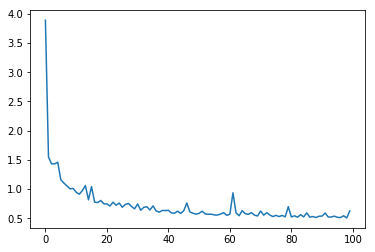

In [122]:
iterations = 10000
learning_rate = 0.1
costs = [] # keep costs during training, see if they go down
w1,w2,b = rand()

for i in range(iterations):
    # get a random point
    ri = np.random.randint(len(data))
    point = data[ri]
        
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z) # networks prediction
        
    target = point[2]
        
    # cost for current random point
    cost = np.square(pred - target)
    
    # costu binde bir bastırırız(cost değeri tüm data değerlerinin toplamı şeklidedir)
    if i % 100 == 0:
        c = 0
        for j in range(len(data)):
            p = data[j]
            p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
            c += np.square(p_pred - p[2])
        costs.append(c)
    
    dcost_dpred = 2 * (pred - target)
    dpred_dz = sigmoid_p(z)
        
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1
        
    dcost_dz = dcost_dpred * dpred_dz
        
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db = dcost_dz * dz_db
        
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db
    
plt.plot(costs)

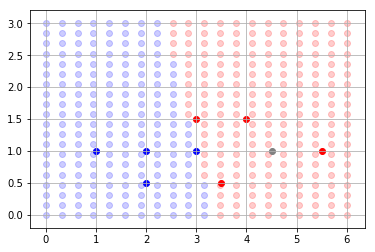

In [123]:
# check out the networks predictions in the x,y plane
for x in np.linspace(0, 6, 20):
    for y in np.linspace(0, 3, 20):
        pred = sigmoid(w1 * x + w2 * y + b)
        c = 'b'
        if pred > .5:
            c = 'r'
        plt.scatter([x],[y],c=c, alpha=.2)#sonuçları soluk göstermek için alpha var
        
# plot points over network predictions
# you should see a split, with half the predictions blue
# and the other half red.. nicely predicting each data point!
#bilinmeyen değere x dedim
vis()

Görüldüğü gibi bilinmeyen noktamız kırmızı alan içerisindedir